In [2]:
import networkx as nx

# help(nx.from_numpy_array)

Help on function from_numpy_array in module networkx.convert_matrix:

from_numpy_array(A, parallel_edges=False, create_using=None)
    Returns a graph from NumPy array.
    
    The NumPy array is interpreted as an adjacency matrix for the graph.
    
    Parameters
    ----------
    A : NumPy ndarray
        An adjacency matrix representation of a graph
    
    parallel_edges : Boolean
        If this is True, `create_using` is a multigraph, and `A` is an
        integer array, then entry *(i, j)* in the array is interpreted as the
        number of parallel edges joining vertices *i* and *j* in the graph.
        If it is False, then the entries in the array are interpreted as
        the weight of a single edge joining the vertices.
    
    create_using : NetworkX graph constructor, optional (default=nx.Graph)
       Graph type to create. If graph instance, then cleared before populated.
    
    Notes
    -----
    If `create_using` is :class:`networkx.MultiGraph` or
    :class:

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
df = pd.read_csv('final_df.csv')

In [3]:
df['publication'].value_counts()

Breitbart              23781
New York Post          17493
CNN                    13993
NPR                    11992
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
tass                     485
abcnews                  474
europe                   360
Name: publication, dtype: int64

In [4]:
df

,Unnamed: 0,content,date,publication,title,url,title+content
0,0,Michigan billionaire education activist Betsy ...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/Politics/pence-break-tie...,"Betsy DeVos Confirmed as Education Secretary, ..."
1,1,First lady Melania Trump has said little about...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/Politics/wireStory/melan...,Melania Trump Says White House Could Mean Mill...
2,2,A House committee voted on Tuesday to eliminat...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/Politics/wireStory/trump...,"As Trump Fears Fraud, GOP Eliminates Election ..."
3,3,"This afternoon, three federal judges from the ...",2017/2/7,abcnews,abcnews,http://abcnews.go.com/Politics/appeals-court-d...,Appeals Court to Decide on Challenge to Trump'...
4,4,At least four tornadoes touched down in Louisi...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/US/23-states-winter-weat...,At Least 4 Tornadoes Reported in Southeast Lou...
5,5,The mother of a backpacker slain in an Austral...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/International/wireStory/...,Mother of Backpacker Slain in Australia Critic...
6,6,"Donald Trump's pick for labor secretary, Andre...",2017/2/7,abcnews,abcnews,http://abcnews.go.com/Politics/trumps-labor-se...,Trump's Labor Secretary Pick Andrew Puzder Adm...
7,7,"Iran's supreme leader said Tuesday that ""newco...",2017/2/7,abcnews,abcnews,http://abcnews.go.com/International/wireStory/...,Iran's Top Leader Mocks 'Newcomer' Trump nan I...
8,8,The European Union is warning Britain that any...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/International/wireStory/...,EU to Britain: Pay Up for What You Ordered Bef...
9,9,A manhunt is intensifying in the Southeast for...,2017/2/7,abcnews,abcnews,http://abcnews.go.com/US/multi-state-manhunt-s...,Multi-State Manhunt in Southeast Intensifies f...


### Topic modeling on Breitbart news papers

In [ ]:
df1 = df[df['publication']=='Breitbart']

In [6]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [8]:
publications = ['Breitbart','New York Post','CNN','NPR','Washington Post','Reuters','Guardian','New York Times','Atlantic','Business Insider','National Review','Talking Points Memo','Vox','Buzzfeed News','Fox News','tass','abcnews','europe']


In [9]:
for publication in publications:
    print('This is ',publication)
    df_p = df[df['publication']==publication]['title+content']

    vectorizer = CountVectorizer(stop_words='english')
    doc_word = vectorizer.fit_transform(df_p)
    lsa = TruncatedSVD(10)
    doc_topic = lsa.fit_transform(doc_word)
    topic_word = pd.DataFrame(lsa.components_.round(3),
    index = ["component_1","component_2",'component3','component4','component5','component6','component7','component8','component9','component10'],
    columns = vectorizer.get_feature_names())
    print(display_topics(lsa, vectorizer.get_feature_names(), 10))


This is  Breitbart

Topic  0
trump, says, 2016, clinton, people, cruz, said, twitter, rubio, pic

Topic  1
says, trump, cruz, rubio, sanders, 2016, kasich, february, asks, march

Topic  2
2016, twitter, trump, pic, 2017, pm, march, 20, https, january

Topic  3
says, 2016, police, update, july, twitter, pic, clinton, sanders, https

Topic  4
clinton, hillary, sanders, percent, campaign, foundation, email, 2016, november, state

Topic  5
2017, january, 20, says, president, twitter, pic, pm, obama, inauguration

Topic  6
rubio, february, cruz, 2017, 20, percent, january, pm, sanders, campaign

Topic  7
people, think, going, said, don, know, like, just, ve, february

Topic  8
2016, june, march, leave, people, remain, eu, britain, result, vote

Topic  9
june, percent, said, update, police, leave, remain, pm, poll, trump
None
This is  New York Post

Topic  0
said, new, just, like, trump, people, time, says, year, years

Topic  1
says, like, new, just, time, year, years, million, people, don


KeyboardInterrupt: 

### Different exploration  of Breitbard

In [10]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(df1['title+content'])
doc_word.shape

(23781, 106060)

In [11]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

In [12]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())
topic_word

,00,000,0000,00001,0002,0002266,0003,0004,00045,0005,...,ｅｔｈｅｒ,ｈｄｍｉ叡,ｉｓｏｌａｔｅｄ,ｍｅｍｅ,ｎｉｇｈｔｃａｌｌ夜,ｓｅｃｏｎｄ,ｓｉｇｈｔ,ｓｌｅｅｐｙ,ｓｐｌａｓｈ,ｖｏｉｄ
component_1,0.287,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_2,0.356,0.000,0.000,0.0,0.001,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_3,0.809,0.208,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_4,0.012,0.000,0.000,0.0,0.000,0.001,0.0,0.0,0.0,0.007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_5,0.071,0.274,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_6,0.204,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_7,0.339,0.354,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_8,0.000,2.768,0.001,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_9,0.423,0.965,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_10,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
topic_word['trump'].sum()

49.556

In [16]:
topic_word['clinton'].sum()

27.475

In [17]:
topic_word['sanders'].sum()

11.583

In [18]:
topic_word['obama'].sum()

12.350999999999999

In [22]:
topic_word['immigration'].sum()

6.0440000000000005

In [23]:
topic_word['environment'].sum()

0.362

In [25]:
topic_word['britain'].sum()

2.559

In [26]:
topic_word['russia'].sum()

1.444

In [27]:
topic_word['china'].sum()

1.4469999999999998

In [ ]:
topic

### Sentiment Analysis using NLTK VADER

In [19]:
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
import re
%matplotlib inline

In [8]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [9]:
df['title+content'] = df['title+content'].map(alphanumeric).map(punc_lower)

NameError: name 're' is not defined

In [ ]:
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english',ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(df['title+content'])
print(feature_matrix.shape)



In [26]:
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [29]:
df['sentiment'] = df['title+content'].map(vader_polarity_compound)

In [30]:
#df.to_csv('df_sentiment.csv')

In [2]:
df_sent = pd.read_csv('df_sentiment.csv',lineterminator='\n')

In [40]:
df_sent_b = df_sent[df_sent['publication'] == 'Breitbart']

In [35]:
list(df[df['sentiment'] < 0]['title+content'][0:10])

['betsy devos confirmed as education secretary  with pence casting historic tie breaking vote nan michigan billionaire education activist betsy devos was confirmed today to serve as the secretary of education in president trump s administration  after vice president mike pence cast a tie breaking vote in the senate  the senate voted on devos  highly contentious nomination this afternoon  and the tally was split evenly  requiring pence to use his authority as president of the upper chamber of congress to break the impasse  this was the first time that a vice president has broken a tie to confirm a cabinet nominee  pence read the vote count     and then voted himself  rendering the tally      the day before the vote  democrats staged a   hour marathon of speeches  with more than   lawmakers taking to the floor to urge at least one additional republican to vote against devos and block her confirmation   it is hard to imagine a worse choice   sen  elizabeth warren  d mass   said before she

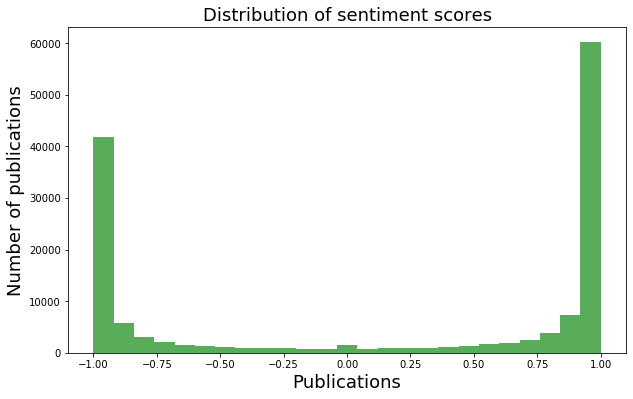

In [37]:
plt.figure(figsize=(10,6))
plt.hist(df.sentiment, bins=25, color='g', alpha=0.65)
plt.title('Distribution of sentiment scores',fontsize=18)
plt.xlabel('Publications',fontsize=18)
plt.ylabel('Number of publications',fontsize=18);

### Cosine simularity 

In [34]:
import numpy as np

In [16]:
def recommend_five():
    g = input('What are you interested in? ')
    query = vectorizer.transform([g])
    similarity = cosine_similarity(query, doc_word)
    nums = np.argsort(similarity[0])[1:100]
    return df_sent_b.loc[nums]

In [17]:
recommend_five()

What are you interested in? immigration


NameError: name 'vectorizer' is not defined

### Text summarization

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx


In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
# df['title+content'].to_csv('convert.txt', header=False, index=False, sep='\t', mode='a')

In [52]:
# df['title+content'].to_csv('df_sentiment.txt')

/anaconda3/envs/Metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
# def read_article(file_name):
#     file = open('convert.txt', "r")
#     filedata = file.readlines()
#     article = filedata[0].split(". ")
#     sentences = []

#     for sentence in article:
#         print(sentence)
#         sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
#     sentences.pop() 
    
#     return sentences


In [40]:
def read_article(file_name):
    sentences = []

    for index,rows in df.iterrows():
        my_list = [rows['title+content']]
        sentences.append(my_list)
    sentences.pop() 
    
    return sentences

In [45]:
read_article(df[1:2])

[['Betsy DeVos Confirmed as Education Secretary, With Pence Casting Historic Tie-Breaking Vote nan Michigan billionaire education activist Betsy DeVos was confirmed today to serve as the secretary of education in President Trump\'s administration, after Vice President Mike Pence cast a tie-breaking vote in the Senate. The Senate voted on DeVos"?highly contentious nomination this afternoon, and the tally was split evenly, requiring Pence to use his authority as president of the upper chamber of Congress to break the impasse. This was the first time that a vice president has broken a tie to confirm a Cabinet nominee. Pence read the vote count 50-50 and then voted himself, rendering the tally 51-50. The day before the vote, Democrats staged a 24-hour marathon of speeches, with more than 30 lawmakers taking to the floor to urge at least one additional Republican to vote against DeVos and block her confirmation. "It is hard to imagine a worse choice,"?Sen. Elizabeth Warren, D-Mass., said be

In [31]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)


In [32]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [38]:
def generate_summary(file_name, top_n=5):
    nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_matrix(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))


In [46]:
generate_summary(df[1:2], 2)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aisuluomar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 